*Use this notebook to complete the sentence similarity and embedding visualization tasks.*


In [53]:
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import gensim.downloader as api
import numpy as np
import umap
import pickle
import nltk

## Part 6: Inspecting and comparing embeddings

### Sentence Similarity

In [54]:
nltk.download('punkt')
nltk.download('punkt_tab')

def tokenize_text(text):
    return word_tokenize(text.lower())

with open('word2vec_embeddings.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

gensim_model = Word2Vec.load("word2vec_text8_gensim.model")
google_word2vec_model = api.load("word2vec-google-news-300")
fasttext_model = api.load("fasttext-wiki-news-subwords-300")

my_pytorch_embeddings = {word: loaded_data['embeddings'][idx] 
                         for word, idx in loaded_data['word2idx'].items()}

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\whcbl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\whcbl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [55]:
# List of sentences for comparison
sentences = [
    "The cat sat on the mat.",
    "A dog is playing in the yard.",
    "I need to buy groceries today.",
    "The feline was resting on the rug.",
    "Canines enjoy outdoor activities.",
    "My shopping list includes milk and bread.",
    "The weather is beautiful today.",
    "Programming requires logical thinking."
]
# Query sentence
query = "My pet cat is sleeping on the carpet."

In [56]:
all_models = {
    "PyTorch Skip-Gram": (my_pytorch_embeddings, 100),
    "Gensim Text8": (gensim_model.wv, 100),
    "Google News (Word2Vec)": (google_word2vec_model, 300),
    "FastText (Wiki)": (fasttext_model, 300)
}

def get_sentence_embedding(tokens, embedding_dict, dim):
    vectors = [embedding_dict[word] for word in tokens if word in embedding_dict]
    
    if not vectors:
        return np.zeros(dim)
    
    return np.mean(vectors, axis=0)

In [57]:
query_tokens = tokenize_text(query)

for model_name, (model_data, dim) in all_models.items():
    print(f"{model_name}")

    q_vec = get_sentence_embedding(query_tokens, model_data, dim).reshape(1, -1)

    results = []
    for s in sentences:
        s_tokens = tokenize_text(s)
        s_vec = get_sentence_embedding(s_tokens, model_data, dim).reshape(1, -1)
        sim_score = cosine_similarity(q_vec, s_vec)[0][0]
        results.append((sim_score, s))
    
    results.sort(key = lambda x: x[0], reverse=True)
    
    for score, sentence in results:
        print(f'"{sentence}": {score:.4f}')
    print("\n")

PyTorch Skip-Gram
"A dog is playing in the yard.": 0.7487
"The cat sat on the mat.": 0.7359
"My shopping list includes milk and bread.": 0.6727
"The feline was resting on the rug.": 0.5912
"The weather is beautiful today.": 0.5487
"I need to buy groceries today.": 0.5343
"Canines enjoy outdoor activities.": 0.3753
"Programming requires logical thinking.": 0.3682


Gensim Text8
"The cat sat on the mat.": 0.7013
"A dog is playing in the yard.": 0.6058
"The feline was resting on the rug.": 0.5037
"The weather is beautiful today.": 0.4957
"My shopping list includes milk and bread.": 0.4641
"I need to buy groceries today.": 0.1722
"Canines enjoy outdoor activities.": 0.0696
"Programming requires logical thinking.": 0.0653


Google News (Word2Vec)
"The feline was resting on the rug.": 0.7794
"The cat sat on the mat.": 0.7369
"A dog is playing in the yard.": 0.6483
"My shopping list includes milk and bread.": 0.4970
"The weather is beautiful today.": 0.4310
"Canines enjoy outdoor activities."

### Embedding Visualization

In [58]:
animals = ['dog', 'cat', 'horse', 'cow', 'lion', 'tiger', 'elephant', 'giraffe', 
           'eagle', 'hawk', 'sparrow', 'penguin', 'shark', 'whale', 'dolphin', 'tuna']
foods = ['apple', 'orange', 'banana', 'grape', 'bread', 'pasta', 'rice', 'potato', 
         'chicken', 'beef', 'pork', 'fish', 'coffee', 'tea', 'juice', 'water']

In [59]:
def run_visualizations(model_dict, title):
    words = animals + foods
    vectors = []
    valid_labels = []
    
    for w in words:
        if w in model_dict:
            vectors.append(model_dict[w])
            valid_labels.append(w)
            
    vectors = np.array(vectors)
    colors = ['blue' if w in animals else 'red' for w in valid_labels]

    tsne = TSNE(n_components = 2, perplexity = 5, random_state = 42, init = 'pca', learning_rate = 'auto')
    vis_tsne = tsne.fit_transform(vectors)

    reducer = umap.UMAP(n_neighbors = 5, min_dist = 0.3, random_state = 42)
    vis_umap = reducer.fit_transform(vectors)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))
    
    for i, word in enumerate(valid_labels):
        ax1.scatter(vis_tsne[i, 0], vis_tsne[i, 1], c = colors[i])
        ax1.annotate(word, (vis_tsne[i, 0], vis_tsne[i, 1]), fontsize = 9)
        ax2.scatter(vis_umap[i, 0], vis_umap[i, 1], c = colors[i])
        ax2.annotate(word, (vis_umap[i, 0], vis_umap[i, 1]), fontsize = 9)

    ax1.set_title(f"{title} - t-SNE")
    ax2.set_title(f"{title} - UMAP")
    plt.show()

c:\stat359\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


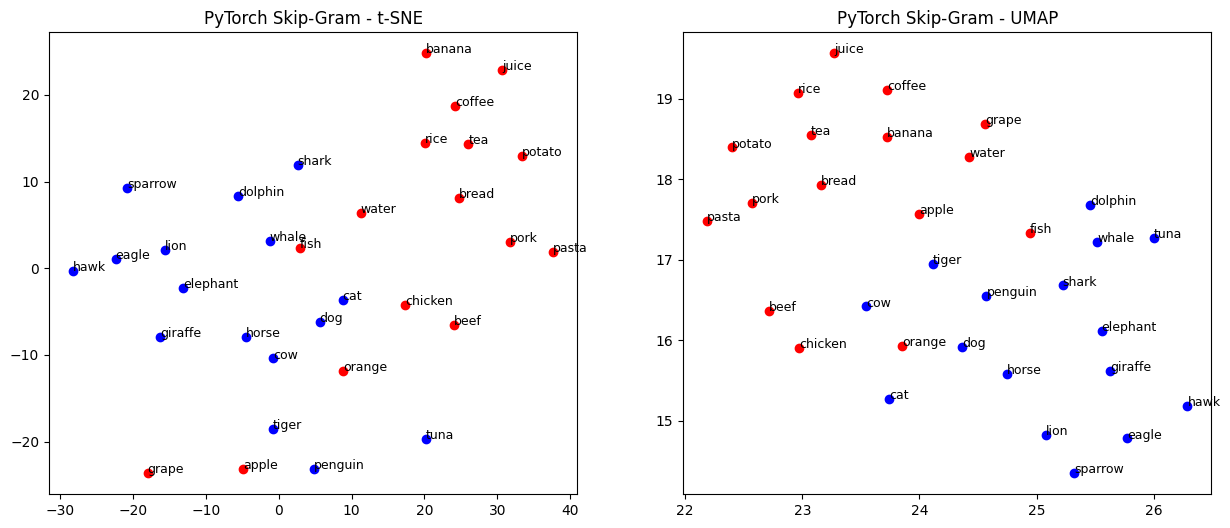

c:\stat359\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


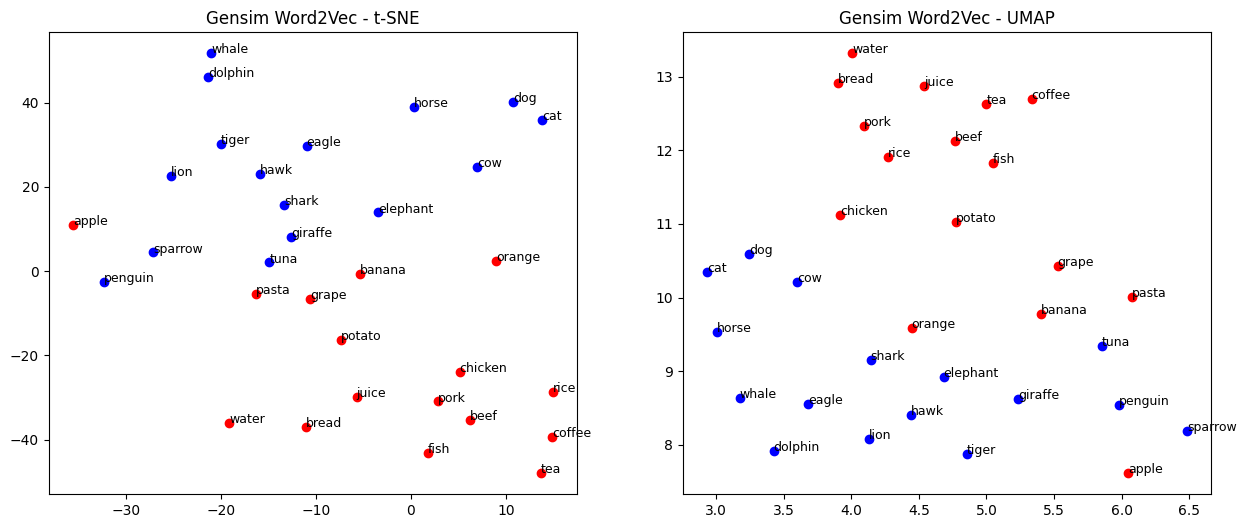

c:\stat359\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


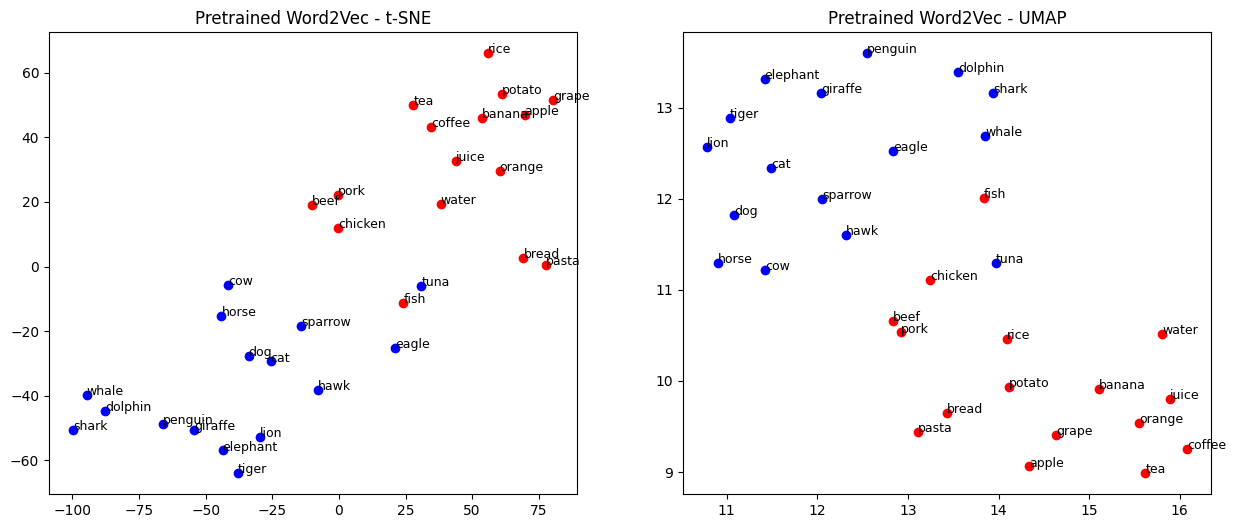

c:\stat359\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


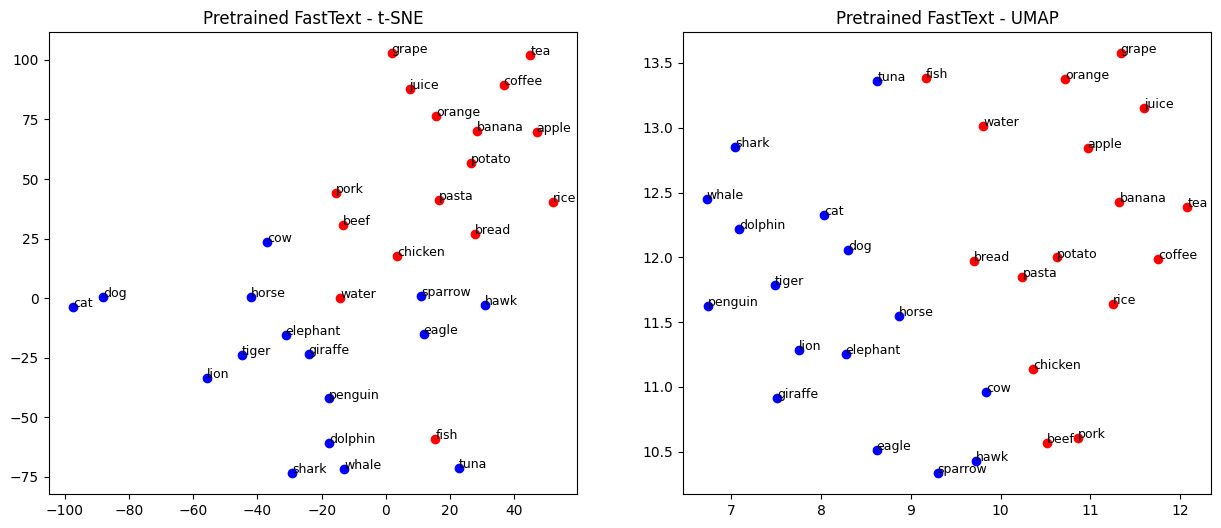

In [60]:
run_visualizations(my_pytorch_embeddings, "PyTorch Skip-Gram")
run_visualizations(gensim_model.wv, "Gensim Word2Vec")
run_visualizations(google_word2vec_model, "Pretrained Word2Vec")
run_visualizations(fasttext_model, "Pretrained FastText")

## Part 7: Short Answer Questions

- Which embeddings performed best at capturing sentence meaning?

    The pretrained Word2Vec and the pretrained FastText embeddings performed best, since they were the only two models that successfully identified the most similar sentence which is "The feline was resting on the rug". 

- Were the pretrained embeddings significantly better than your own? Why or why not?

    Yes, the pretrained embeddings were significantly better. Based on the sentence similarity, among the four models, only the two pretrained models correctly selected the most similar sentence. Furthermore, according to the embedding visualization, the two pretrained models also showed more clear clustering. Thus, the pretrained embeddings definitely had better performance than my own.

- What factors might explain the differences in performance?

    Firstly, the pretrained models were trained on billions of tokens, so their data volumes are much larger than my own embedding. Therefore, they were more likely to learn the less frequent words like "feline" and "rug" that my own model might have only seen a few times.
    Secondly, FastText is particularly strong because it can understand that "sleeping" and "resting" are related even if it hasn't seen those specific word forms frequently, whereas my Skip-gram model treats every word as a unique, atomic ID.
    Furthermore, less frequent words might have had very low-quality vectors in my embeddings, whereas the pretrained models have high-quality representations for millions of distinct words.

## AI Use Disclosure (Required)

If you used any AI-enabled tools (e.g., ChatGPT, GitHub Copilot, Claude, or other LLM assistants) while working on this assignment, you must disclose that use here. The goal is transparency-not punishment.

In your disclosure, briefly include:
- **Tool(s) used:** (name + version if known)
- **How you used them:** (e.g., concept explanation, debugging, drafting code, rewriting text)
- **What you verified yourself:** (e.g., reran the notebook, checked outputs/plots, checked shapes, read documentation)
- **What you did *not* use AI for (if applicable):** (optional)

You are responsible for the correctness of your submission, even if AI suggested code or explanations.

#### <font color="red">Write your disclosure here.</font>
- **Tool(s) used:** Google Gemini
- **How you used them:** Debugging, concept explanation, Looking for ways to improve the training speed, getting hints for the code, solving github issues
- **What you verified yourself:** Checked outputs/plots, checked shapes, did data comparison, searched for instructions, checked lecture slides
- **What you did *not* use AI for (if applicable):** (optional)
